<h1><center>Exploratory Data Analysis using Python for Car Sales Data</center></h1>

![title](image1.png "Car Sales Data")

## 1. Importing Packages

In [1]:
import numpy as np                     # used for multi-dimentional arrays and matrics
import pandas as pd                    # used for data manipulation and analysis 
import pandas_profiling                # used for data profiling
import seaborn as sns                  # used for high level interface for drawing attractive & informative statistical graphics
import matplotlib as mat               # Plotting library for Python programming language
import matplotlib.pyplot as plt
import bokeh                           # interactive visualization library for Python
import sys                             # provides information about constants, functions and methods of the Python interpreter
import os
%matplotlib inline

## 2. Data Loading and Description

__Context__
- This dataset was collected from car sale advertisements for study/practice purposes in 2016. 

- This dataset contains data for more than __9.5K cars sale in Ukraine__. 

__Content__ <br/>
Dataset contains __9576__ rows and __10__ variables with essential meanings:

- __car__: manufacturer brand
- __price__: seller’s price in advertisement (in USD)
- __body__: car body type
- __mileage__: as mentioned in advertisement (‘000 Km)
- __engV__: rounded engine volume (‘000 cubic cm)
- __engType__: type of fuel (“Other” in this case should be treated as NA)
- __registration__: whether car registered in Ukraine or not
- __year__: year of production
- __model__: specific model name
- __drive__: drive type

### 2.1 Loading Data

In [2]:
cardata = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv',sep=',',encoding='latin-1')
cardata.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


### 2.2 Rename Columns name.

In [3]:
cardata.rename(columns={'car':'brand','year':'prod_year'},inplace=True) # Rename some columns name, to get meaningful information
cardata.shape

(9576, 10)

### 2.3 Removing Duplicate Rows

In [4]:
cardata.drop_duplicates(keep=False, inplace=True)           # Removing duplicate rows
cardata.shape

(9375, 10)

This dataset had __201__ duplicate rows, which was removed here and now __9375__ unique rows are present in dataset

## 3. Data Profiling

- We will first __understand our dataset__ using various pandas functionalities.
- Then we will do __pandas profiling__ to find out which columns of our dataset need preprocessing.
- In preprocessing we will deal with __zero and missing values__ columns.
- again we will do __pandas profiling__ to see how preprocessing have transformed our dataset

### 3.1 Understanding the Dataset 

In [8]:
cardata.columns                                          # This will print name of all columns

Index(['brand', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'prod_year', 'model', 'drive'],
      dtype='object')

In [9]:
cardata.dtypes                                           # This will print datatypes of all columns

brand            object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
prod_year         int64
model            object
drive            object
dtype: object

In [10]:
cardata.head()                                          # This will print top 5 rows of dataset

,brand,price,body,mileage,engV,engType,registration,prod_year,model,drive
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [11]:
cardata.tail()                                         # This will print last 5 rows of dataset

,brand,price,body,mileage,engV,engType,registration,prod_year,model,drive
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [12]:
cardata.info()                                        # This will show index, data type and memory information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9375 entries, 2 to 9575
Data columns (total 10 columns):
brand           9375 non-null object
price           9375 non-null float64
body            9375 non-null object
mileage         9375 non-null int64
engV            8941 non-null float64
engType         9375 non-null object
registration    9375 non-null object
prod_year       9375 non-null int64
model           9375 non-null object
drive           8866 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 805.7+ KB


In [13]:
cardata.describe(include='all')                       # This will display statistical information of dataset

,brand,price,body,mileage,engV,engType,registration,prod_year,model,drive
count,9375,9375.000000,9375,9375.000000,8941.000000,9375,9375,9375.000000,9375,8866
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,919,NaN,3601,NaN,NaN,4309,8814,NaN,188,5156
mean,NaN,15010.846384,NaN,140.751360,2.637962,NaN,NaN,2006.464107,NaN,NaN
std,NaN,22091.098664,NaN,98.345011,5.991054,NaN,NaN,7.059092,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,72.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9025.000000,NaN,130.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16300.000000,NaN,196.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


Here we can see that __price__ and __mileage__ columns have a minimum value of __zero__, __zero values__ does not make sense and indicates an invalid or missing value. 

In [14]:
cardata.isnull().sum()                                # This will print count of NaN values in column     

brand             0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
prod_year         0
model             0
drive           509
dtype: int64

From the above output we can see that __engV__ and __drive__ columns contains null values. We will see further how to deal with them

### 3.2 Pre Profiling of Data

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [15]:
preprofile = pandas_profiling.ProfileReport(cardata)
preprofile.to_file(outputfile="cardata_before_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __cardata_before_preprocessing.html__. We can find useful insight by analyzing this file. <br/>
Now we will process our data to better understand it.

### 3.3 Preprocessing of Data

- Drop column __model__ due to high __cardinality__.

In [5]:
cardata.drop(['model'], axis=1, inplace=True)                        # Droping column model
cardata.head(5)

,brand,price,body,mileage,engV,engType,registration,prod_year,drive
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,rear
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,NaN
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,rear


- __Dealing with zero values__<br/>

- Replacing zero values of __price__ column with mean value of price, group by on __car__ column.

In [6]:
cardata['price'].astype(bool).sum(axis=0)                         # This will print count of all non zero values in column

9151

From the above output we can see that __price__ column has 9151 non zero value out of 9375 rows, i.e. __224__ observation has __zero__ value for __price__ column.

In [7]:
cardata['price'] = cardata['price'].replace(0,np.nan)                     # This will replace zero value with NaN

In [8]:
cardata['price'].fillna(cardata.groupby('brand')['price'].transform('mean'),inplace=True) # This will replace NaN with mean

In [9]:
cardata[cardata['price'].isnull()]                                      # Check the observation for NaN value after replacing 

,brand,price,body,mileage,engV,engType,registration,prod_year,drive
8824,Fisker,NaN,other,100,NaN,Other,yes,2001,NaN


- From the above output we can see that, still we have 1 observation with null value for __price__ column, after replacing null   values with mean.<br/>
- This observation still exist with null value, because we  had only 1 observation for car brand __Fisker__ with zero price in   our dataset before processing the data, so when we calculate __mean__ value of __price__ group by __brand__ then we got the null 
  value for this observation, hence it is updated with NaN value.<br/>
- It is only one record and also having null value for __price__, __engV__ and __drive__ column, so we can remove this row.

In [10]:
# This will drop the observation which has null value of price
cardata.drop(cardata[cardata['price'].isnull()].index, inplace = True) 

- __Dealing with zero values__<br/>

- Replacing zero values of __mileage__ column with mean value of mileage, group by on __brand__ column.

In [11]:
cardata['mileage'].astype(bool).sum(axis=0)                         # This will print count of all non zero values in column

9089

From the above output we can see that __mileage__ column has 9089 non zero value out of 9374 rows, i.e. __285__ observation has zero value for __mileage__ column.

In [12]:
cardata['mileage'] = cardata['mileage'].replace(0,np.nan)                     # This will replace zero value with NaN

In [13]:
# This will replace NaN with mean
cardata['mileage'].fillna(cardata.groupby('brand')['mileage'].transform('mean'),inplace=True) 

In [14]:
cardata[cardata['mileage'].isnull()]                                      # Check the observation for NaN value after replacing 

,brand,price,body,mileage,engV,engType,registration,prod_year,drive


From the above output we can see that, now __mileage__ column does not have any null value

- __Dealing with missing values__<br/>

- Replacing null values of __engV__ column with mean value of __engV__ column.

In [15]:
cardata.isnull().sum()

brand             0
price             0
body              0
mileage           0
engV            433
engType           0
registration      0
prod_year         0
drive           508
dtype: int64

As per the above output __engV__ column has 433 null values, now we will replace these null values with mean of __engV__ column.

In [16]:
# This will replace NaN with mean
cardata['engV'].fillna(cardata['engV'].mean(), inplace=True) 

In [17]:
cardata.isnull().sum()                                          # Check null value after transforming engV column

brand             0
price             0
body              0
mileage           0
engV              0
engType           0
registration      0
prod_year         0
drive           508
dtype: int64

Now as per the above output __drive__ column has 508 null values, __drive__ column has categorical values so we will replace null values with __mode__ of __drive__ column.

In [18]:
# This will replace NaN with mode
cardata['drive'].fillna(cardata['drive'].mode()[0], inplace=True) 

In [19]:
cardata.isnull().sum()                                          # Check null value after transforming drive column

brand           0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
prod_year       0
drive           0
dtype: int64

Now as per the above output none of the columns have null values.

### 3.4 Post Profiling of Data

In [37]:
postprofile = pandas_profiling.ProfileReport(cardata)
postprofile.to_file(outputfile="cardata_after_preprocessing.html")

In [20]:
cardata.describe(include='all')

,brand,price,body,mileage,engV,engType,registration,prod_year,drive
count,9374,9374.000000,9374,9374.000000,9374.000000,9374,9374,9374.000000,9374
unique,86,NaN,6,NaN,NaN,4,2,NaN,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,front
freq,919,NaN,3601,NaN,NaN,4309,8813,NaN,5664
mean,NaN,15517.081150,NaN,145.255332,2.637962,NaN,NaN,2006.464690,NaN
std,NaN,22168.588839,NaN,95.358965,5.851035,NaN,NaN,7.059242,NaN
min,NaN,259.350000,NaN,1.000000,0.100000,NaN,NaN,1953.000000,NaN
25%,NaN,5400.000000,NaN,80.000000,1.600000,NaN,NaN,2004.000000,NaN
50%,NaN,9500.000000,NaN,133.000000,2.000000,NaN,NaN,2008.000000,NaN
75%,NaN,16999.000000,NaN,196.000000,2.637962,NaN,NaN,2012.000000,NaN


We have processed the data and now the dataset does not contain any missing values. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. 
observations:

- In the Dataset info, __Total Missing(%) = 0.0%__
- Number of variables = 9

## 4. Questions

### Q 1. Which brand of cars sold the most ?

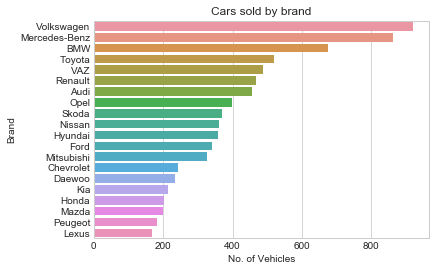

In [73]:
# top 30 brands which cars sold the most
sns.countplot(y = 'brand', data = cardata, order = cardata['brand'].value_counts().nlargest(20).index)
plt.title("Cars sold by brand")
plt.ylabel('Brand')
plt.xlabel('No. of Vehicles');
plt.show()

By this chart we can say that the most cars sold by the company __Volkswagen__ followed by __Mercedes-Benz__ and __BMW__.

### Q 2. Which body segment of cars sold the most ?

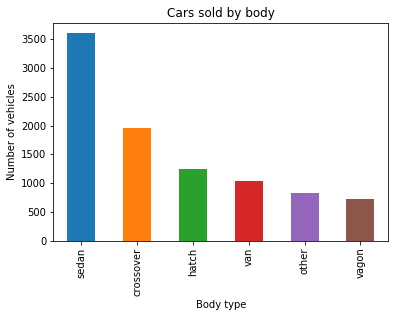

In [22]:
cardata['body'].value_counts().plot.bar()                      # Bar chart for car 'body' variable
plt.title("Cars sold by body")
plt.ylabel('Number of vehicles')
plt.xlabel('Body type');

This chart says that __"Sedan"__ body type cars are the most sold cars, if we want to see it in terms of %, then we can see it in below chart. We can say this in other terms that the most preferred choice for people is __Sedan__, because it is the perfect and comfertable car for small size family within lower budget.

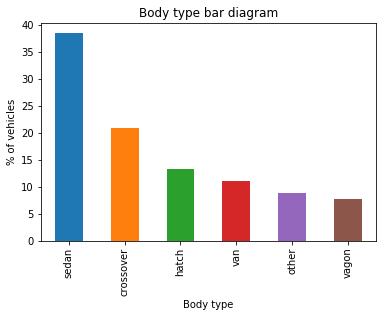

In [23]:
(cardata['body'].value_counts() / len(cardata)*100).plot.bar()                # Bar chart of car 'body in terms of %'
plt.title("Body type bar diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Body type');

Now we can say that approx 38% of total cars sold in __Sedan__ body type, 21% in __Crossover__ body type and 13% in __Hatch__ body type.

### Q 3. Which drive segment of cars in which body type sold the most ?

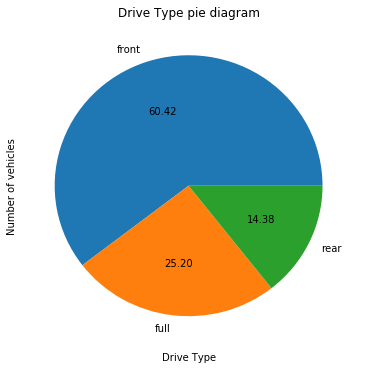

In [24]:
# Pie chart of car 'drive' type
cardata['drive'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Drive Type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive Type');

We can say that the most sold cars in __front__ drive type, in terms of percentage we can say that, approx 61% of total cars sold in __front__ drive type, 25% in __full__ drive type and 14% in __rear__ drive type.

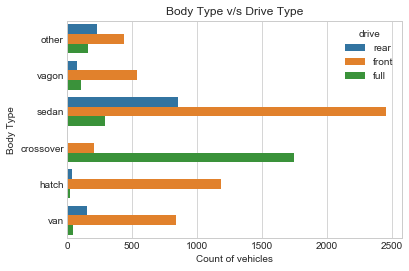

In [76]:
# Body type and Drive type analysis
sns.countplot(y='body',data=cardata, hue='drive')
plt.title("Body Type v/s Drive Type")
plt.ylabel('Body Type')
plt.xlabel('Count of vehicles');

- __"Front"__ wheel drive cars are th top most cars in all body type except in __"Crossover"__ body type. 
- In __"Crossover"__ body type __"Full"__ wheel drive cars are leading.   

### Q 4. Which price segment cars sold the most ?

In [25]:
cardata['price'].min()                           # minimum price

259.35

In [26]:
cardata['price'].max()                           # maximum price

547800.0

This dataset has minimum price of car as __259.35__ and maximum price as __547800__, so we can create a new field __price_group__ and update it with 5 to 6 price groups

In [27]:
# Create a new column 'price_group' and assign the value based on car price
cardata['price_group'] = pd.cut(cardata['price'],[0,20000,40000,60000,80000,100000,600000], 
                                labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest = True)
cardata['price_group'] = cardata['price_group'].astype(object)

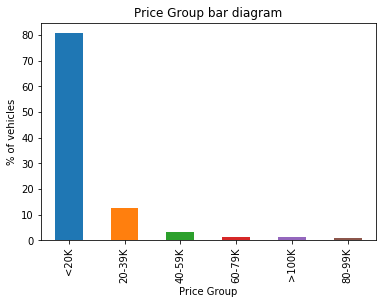

In [28]:
(cardata['price_group'].value_counts() / len(cardata) *100).plot.bar()
plt.title("Price Group bar diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group');

By this chart we can say that approx __80%__ of cars sold in the __price range of less than or equal to $ 20000__

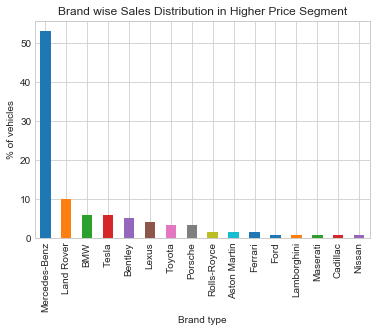

In [80]:
# Brand wise car sale in higher price segment
carprc = cardata.loc[cardata['price'] >= 100000]
(carprc['brand'].value_counts() / len(carprc)*100).plot.bar()                # Bar chart of car 'body in terms of %'
plt.title("Brand wise Sales Distribution in Higher Price Segment")
plt.ylabel('% of vehicles')
plt.xlabel('Brand type');

__"Mercedes-Benz"__ is the leading brand in higher price segment cars

### Q 5. How does price relate to body and drive type of car? 

- __price group__ v/s __body type__

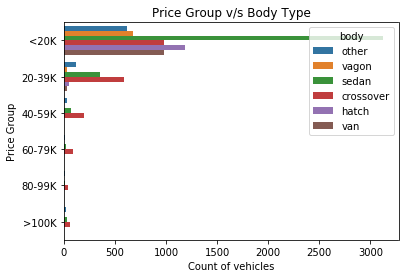

In [29]:
# body type v/s price group
sns.countplot(y='price_group',data=cardata, hue='body', order=['<20K','20-39K','40-59K','60-79K','80-99K','>100K'])           
plt.title("Price Group v/s Body Type")
plt.ylabel('Price Group')
plt.xlabel('Count of vehicles');

By this chart we can say that
- The most cars sold in price range of __200 to 19999__ and majority of these are in __Sedan__  body type. 
- The majority is __Crossover__ body type in Cars sold at a price __20000 or above__.

- __price group__ v/s __drive type__

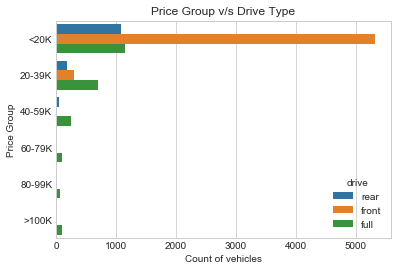

In [74]:
# drive type v/s price group
sns.countplot(y='price_group',data=cardata, hue='drive', order=['<20K','20-39K','40-59K','60-79K','80-99K','>100K'])
plt.title("Price Group v/s Drive Type")
plt.ylabel('Price Group')
plt.xlabel('Count of vehicles');

By this chart we can say that 
- The most cars sold in price range of __200 to 19999__ and majority of these are in __Front__  drive type. 
- The majority is __Full__ drive type in Cars sold at a price __20000 or above__.

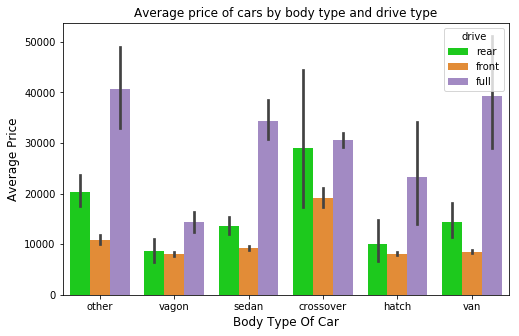

In [31]:
# Average price of vehicles by body type and drive type
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="body", y="price",hue="drive", palette=colors, data=cardata)
ax.set_title("Average price of cars by body type and drive type",fontdict= {'size':12})
ax.xaxis.set_label_text("Body Type Of Car",fontdict= {'size':12})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':12})
plt.show()

By this chart we can say that __all body types__ of cars have __more average price__ for __full drive type__ cars compare to __other drive types__.

### Q 6. Does the engType have any impact on price of the car?

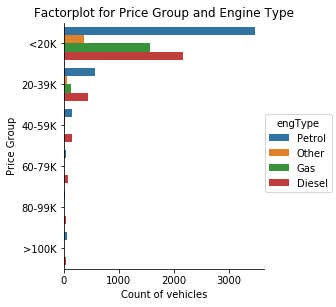

In [32]:
# Price group v/s engType
sns.factorplot(y='price_group', data=cardata, hue='engType', kind= 'count', order=['<20K','20-39K','40-59K','60-79K','80-99K','>100K'])   
plt.title('Factorplot for Price Group and Engine Type')
plt.ylabel('Price Group')
plt.xlabel('Count of vehicles');

By this chart we can say that
- The most cars sold in price range of __200 to 19999__ and majority of these are in __Petrol__ engine type. 
- The majority is __Diesel__ engine type in Cars sold at a price __20000 or above__..

### Q 7. How does price relate to engine type (engType) and drive type of the car?

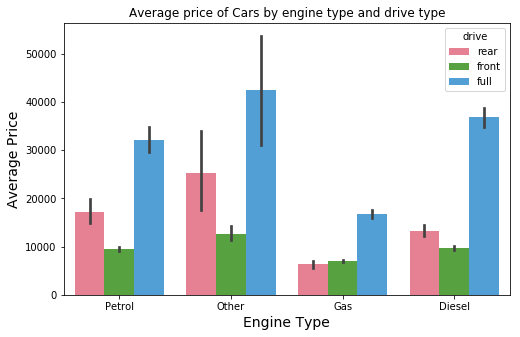

In [33]:
# barplot for price based on engine type and drive type
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="engType", y="price",hue="drive", palette="husl",data=cardata)
ax.set_title("Average price of Cars by engine type and drive type",fontdict= {'size':12})
ax.xaxis.set_label_text("Engine Type",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
plt.show()

By this chart we can say that the cars sold in __all engine type__ have __more average price__ for __full drive type__ cars compare to __other drive type__ cars.

### Q 8. Which engine volume (engV) cars sold the most ?

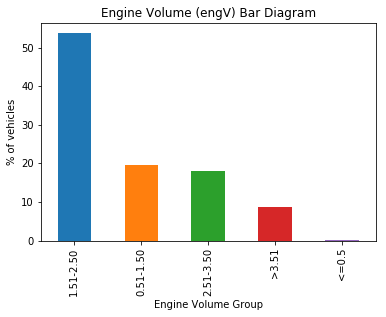

In [34]:
# grouping of engV  
(pd.cut(cardata['engV'],[0,0.51,1.51,2.51,3.51,100], 
        labels = ['<=0.5','0.51-1.50','1.51-2.50','2.51-3.50','>3.51']).value_counts() / len(cardata)*100).plot.bar()    
plt.title("Engine Volume (engV) Bar Diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Engine Volume Group');

By this chart we can say that below are the __top three categories__ of __Engine Volume (engV)__ cars sold.
- __Ist Category__   : > 1.5 & <= 2.5 (In this category approx __55%__ of cars are available)
- __IInd Category__  : > 0.5 & <= 1.5 (In this category approx __19%__ of cars are available)
- __IIIrd Category__ : > 2.5 & <= 3.5 (In this category approx __18%__ of cars are available)

Out of total cars sold, approx __92%__ cars fall in range of engine volume more than __1.5 CC to  3.5 CC__

(0, 6)

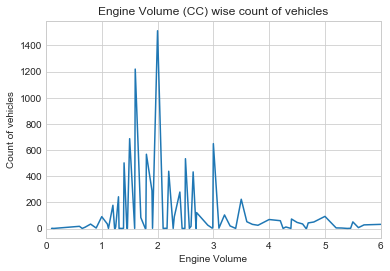

In [59]:
# engine volume wise count of vehicles
careng = cardata.loc[cardata['engV'] <= 6]
careng['engV'].value_counts().sort_index().plot.line()
plt.title("Engine Volume (CC) wise count of vehicles")
plt.ylabel('Count of vehicles')
plt.xlabel('Engine Volume');
plt.xlim(0,6)

By this chart we can say that most of the cars sold have __2.0 CC__ engine volume followed by __1.5 CC__, there are very __few cars sold__ with engine volume __less than equal to 1.0 CC and greater than equal to 4.0 CC__.  

### Q 9. How does engine volume (engV) relate to mileage of the car?

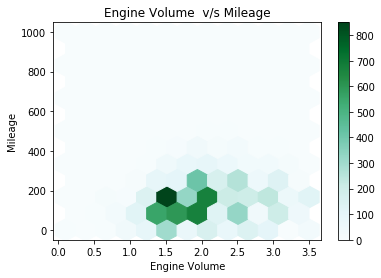

In [35]:
# engV v/s mileage
cardata[cardata['engV'] < 3.51].plot.hexbin(x='engV', y='mileage', sharex=False, gridsize=12)
plt.title("Engine Volume  v/s Mileage")
plt.ylabel('Mileage')
plt.xlabel('Engine Volume');

By this chart we can say that most of the cars sold with __engine volume (engV)__ as 1.5 CC and __mileage__ as approx 200.

### Q 10. How does price is relate to mileage and production year of the car?

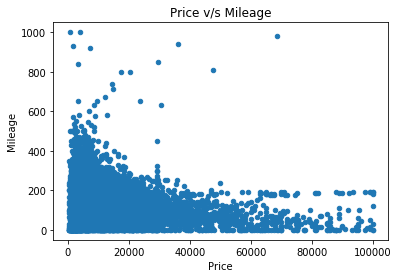

In [36]:
# price v/s mileage 
cardata[cardata['price'] < 100000 ].plot.scatter(x='price', y='mileage')
plt.title("Price v/s Mileage")
plt.ylabel('Mileage')
plt.xlabel('Price');

By this chart we can say that __price__ and __mileage__ have __strogly negative correlation__ in sold car dataset , i.e. lower price segment has higher mileage and higher price segment has lower mileage. 

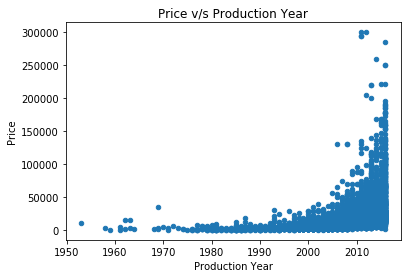

In [37]:
# price v/s production year
cardata[cardata['price'] <= 300000].plot.scatter(x='prod_year',y='price')
plt.title("Price v/s Production Year")
plt.ylabel('Price')
plt.xlabel('Production Year');

By this chart we can say that 
- Majority of the cars with __production year 2008 or later__ sold in __price 50000 or lower__. 
- All the cars with __production year 2010 or later__ sold in __price more than 50000__.
- All the cars with __production year before 2010__ sold in __price 50000 or lower__.

### Q 11. Which production year of cars sold the most ?

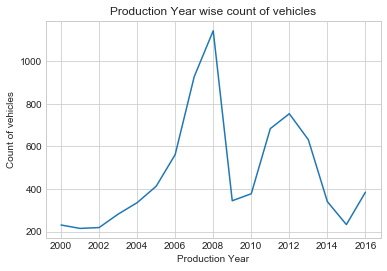

In [41]:
# production year wise count of vehicles
caryr = cardata.loc[cardata['prod_year'] >= 2000]
caryr['prod_year'].value_counts().sort_index().plot.line()
plt.title("Production Year wise count of vehicles")
plt.ylabel('Count of vehicles')
plt.xlabel('Production Year');

By this chart we can say that, __Production year 2008 and 2012__ cars are sold the most. 

### Q 12. How does production year relate to registration?

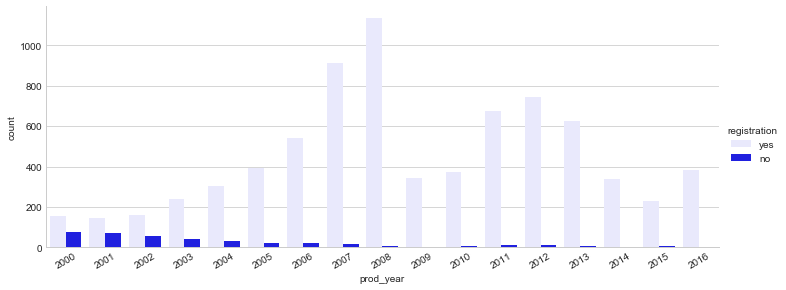

In [42]:
# Production year v/s registration
cc = cardata.loc[cardata['prod_year'] >= 2000]

g = sns.factorplot('prod_year',data=cc,aspect=2.5, kind='count',hue='registration',color="b")
g.set_xticklabels(rotation=30)

By this chart we can say that majority of the cars sold with __production year 2008 or later__ were __registered in Ukrain__.

### Q 13. Correlation between various features of car data.

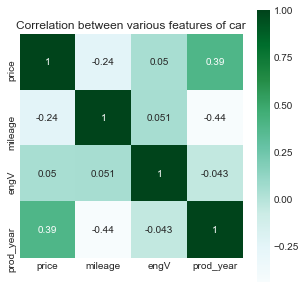

In [43]:
car_corr = cardata.corr()
car_corr
plt.figure(figsize=(5,5))
sns.heatmap(car_corr,vmax=1,square=True,annot=True, cmap='BuGn')
plt.title("Correlation between various features of car")
plt.show()

By this heatmap we can say that;
- __price__ and __production year__ variables have __strong positive correlation__, i.e. latest production year cars have high  price and older production year cars have lower price.
- __price and engine volume (engV)__ have __mild positive correlation__.
- __engine volume (engV) and mileage__ also have some __mild positive correlation__, generally engine volume and mileage do not have positive correlation, but in our data most of the cars have engine volume in between 1.5 CC to 2.5 CC, due to that mileage and engine volume have mild positive correlation.
- __production year__ and __mileage__ variables have __strong negative correlation__, i.e. latest production year cars have high mileage and older production year cars have low mileage.
- __price and mileage__ have __negative correlation__, i.e. lower price cars have higher mileage and higher price cars have     lower mileage.
- __production year and engine volume (engV)__ also have some __negative correlation__.

## 5. Conclusion

- In this dataset We have total 9374 observations after removing duplicate records.
- We observe that out of total cars sold, majority of the cars sold by __"Volkswagen"__, __"Mercedes-Benz"__ and __"BMW"__ brand.
- __"Sedan"__, __"Crossover"__ and __"Hetch"__ body types cars are the highest sold cars.
- __"Front" drive type__ segment cars are the highest sold cars, because most of the cars of this segment falls in lower price range.
- __"Front"__ wheel drive cars are th top most cars in all body type except in __"Crossover"__ body type. In __"Crossover"__ body type __"Full"__ wheel drive cars are leading.  
- __80%__ of total cars sold in the __price range of 200 to 20000__ with __body type as "Sedan"__, __drive type as "Front"__ and __engine type as "Petrol"__, because the middle class families preferred low price cars with Sedan body and Petrol engine type.
- __"Mercedes-Benz"__ is the leading brand in higher price segment cars.
- Majority of the __higher price range__ cars sold with __body type as "Crossover"__, __drive type as "Full"__ and __engine type as "Diesel"__.
- All __body segment__ of cars have __more average price__ for __"Full" drive type__ cars compare to other drive type cars. 
- All __engine types__ of cars have __more average price__ for __"Full" drive type__ cars compare to other drive type cars.
- Approx __55%__ of total cars sold have __engine volume in the range of 1.5 CC to 2.5 CC__.
- Most of the cars sold in __2.0 CC__ engine volume segment followed by __1.5 CC__, there are very __few cars sold below 1.0 CC and above 4.0 CC__
- We have also observed that __lower price segment__ car has __higher mileage__ and __higher price segment__ car has __lower mileage__.
- Majority of the cars with __production year 2008 or later__ were __registered in Ukrain__ sold in __price of 50000 or lower__.
- Production year __2008__ and __2012__ cars are the highest sold cars.
- __Price__ has __positive correlation__ with __engine volume__ and __production year__ and __negatively correlation__ with __mileage__.
- __Production year__ has __negative correlation__ with __mileage__ and __engine volume__.